<a href="https://colab.research.google.com/github/gurpinder95/my-1st-Data-science/blob/main/Normal_distribution_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [5]:
beml_df=pd.read_csv("BEML.csv")
glaxo_df=pd.read_csv("GLAXO.csv")

In [6]:
beml_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [7]:
#filterng date close as we are looking for gain
beml_df[["Date","Close"]]

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [8]:
#Lets store the above date close in variable bem1
beml=beml_df[["Date","Close"]]  
#same way storing for glaxo date close
glaxo=glaxo_df[["Date","Close"]]

In [20]:
beml.dtypes
glaxo.dtypes
#Since date is an object here we need to convert it in datetime index to use it as indexing

Date      object
Close    float64
dtype: object

In [25]:
#converting in Datetime Index
bem1=beml.set_index(pd.DatetimeIndex(beml["Date"]))
glaxo=glaxo.set_index(pd.DatetimeIndex(glaxo["Date"]))

In [28]:
beml  #Now date is appearing as index also

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


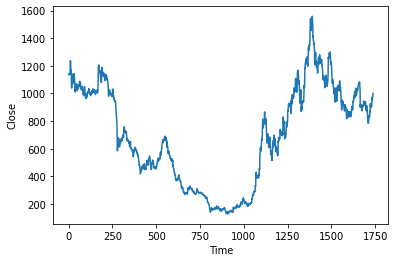

In [9]:
#Lets visualise the above data beml,glaxo in matplot graph
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 
plt.plot(beml.Close);  # Here indexing of close is Date so date and close will appear in graph
plt.xlabel("Time");
plt.ylabel("Close");
plt.show()



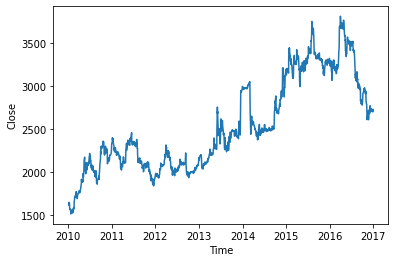

In [40]:
#Graph of glaxo
plt.plot(glaxo.Close);  # Here indexing of close is Date so date and close will appear in graph
plt.xlabel("Time");
plt.ylabel("Close");
plt.show()

In [12]:
#Now lets add gain column in glaxo and beml
glaxo["Gain"]=glaxo.Close.pct_change(periods=1)   #Applying gain formula through percentage change,Actual calc formula for gain=(todayprice-yesterdayprice)/yesterdayprice
beml["Gain"]=beml.Close.pct_change(periods=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
glaxo["Gain"]

0            NaN
1      -0.005444
2       0.013422
3       0.006225
4      -0.005398
          ...   
1734   -0.001283
1735   -0.007986
1736    0.000148
1737    0.009529
1738    0.000697
Name: Gain, Length: 1739, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Gain')

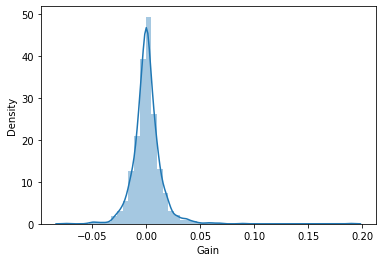

In [14]:
#lets do sn distplot on glaxo
sn.distplot(glaxo.Gain,label="Glaxo",kde=True)
plt.xlabel("Gain")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Gain')

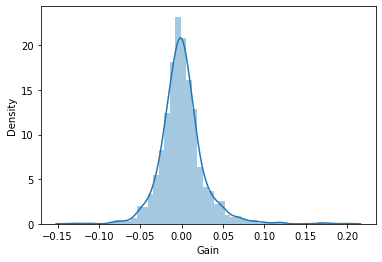

In [15]:
#lets do sn distplot on beml
sn.distplot(beml.Gain,label="BEML",kde=True)
plt.xlabel("Gain")



In [22]:
#lets get the mean and Std deviation of glaxo Gain
print("Mean",round(glaxo.Gain.mean(),4))
print("Std dev",round(glaxo.Gain.std(),4))


Mean 0.0004
Std dev 0.0134


In [23]:
#lets get the mean and Std deviation of beml Gain
print("Mean",round(beml.Gain.mean(),4))
print("Std dev",round(beml.Gain.std(),4))

Mean 0.0003
Std dev 0.0264


In [28]:
#Now we have both data mean and std dev we can calaculate the probability
#Probabaility of making 2% loss or higher in glaxo
stats.norm.cdf(-0.02,loc=glaxo.Gain.mean(),scale=glaxo.Gain.std())



0.06352488667177397

In [29]:
#Probabaility of making 2% gain or higher in glaxo
1-stats.norm.cdf(0.02,loc=glaxo.Gain.mean(),scale=glaxo.Gain.std())

0.07104511457618568